In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(10,9)
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
from sklearn import datasets
boston, y = datasets.fetch_openml('boston', return_X_y=True)
boston['TARGET']=y
boston

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<function matplotlib.pyplot.show(close=None, block=None)>

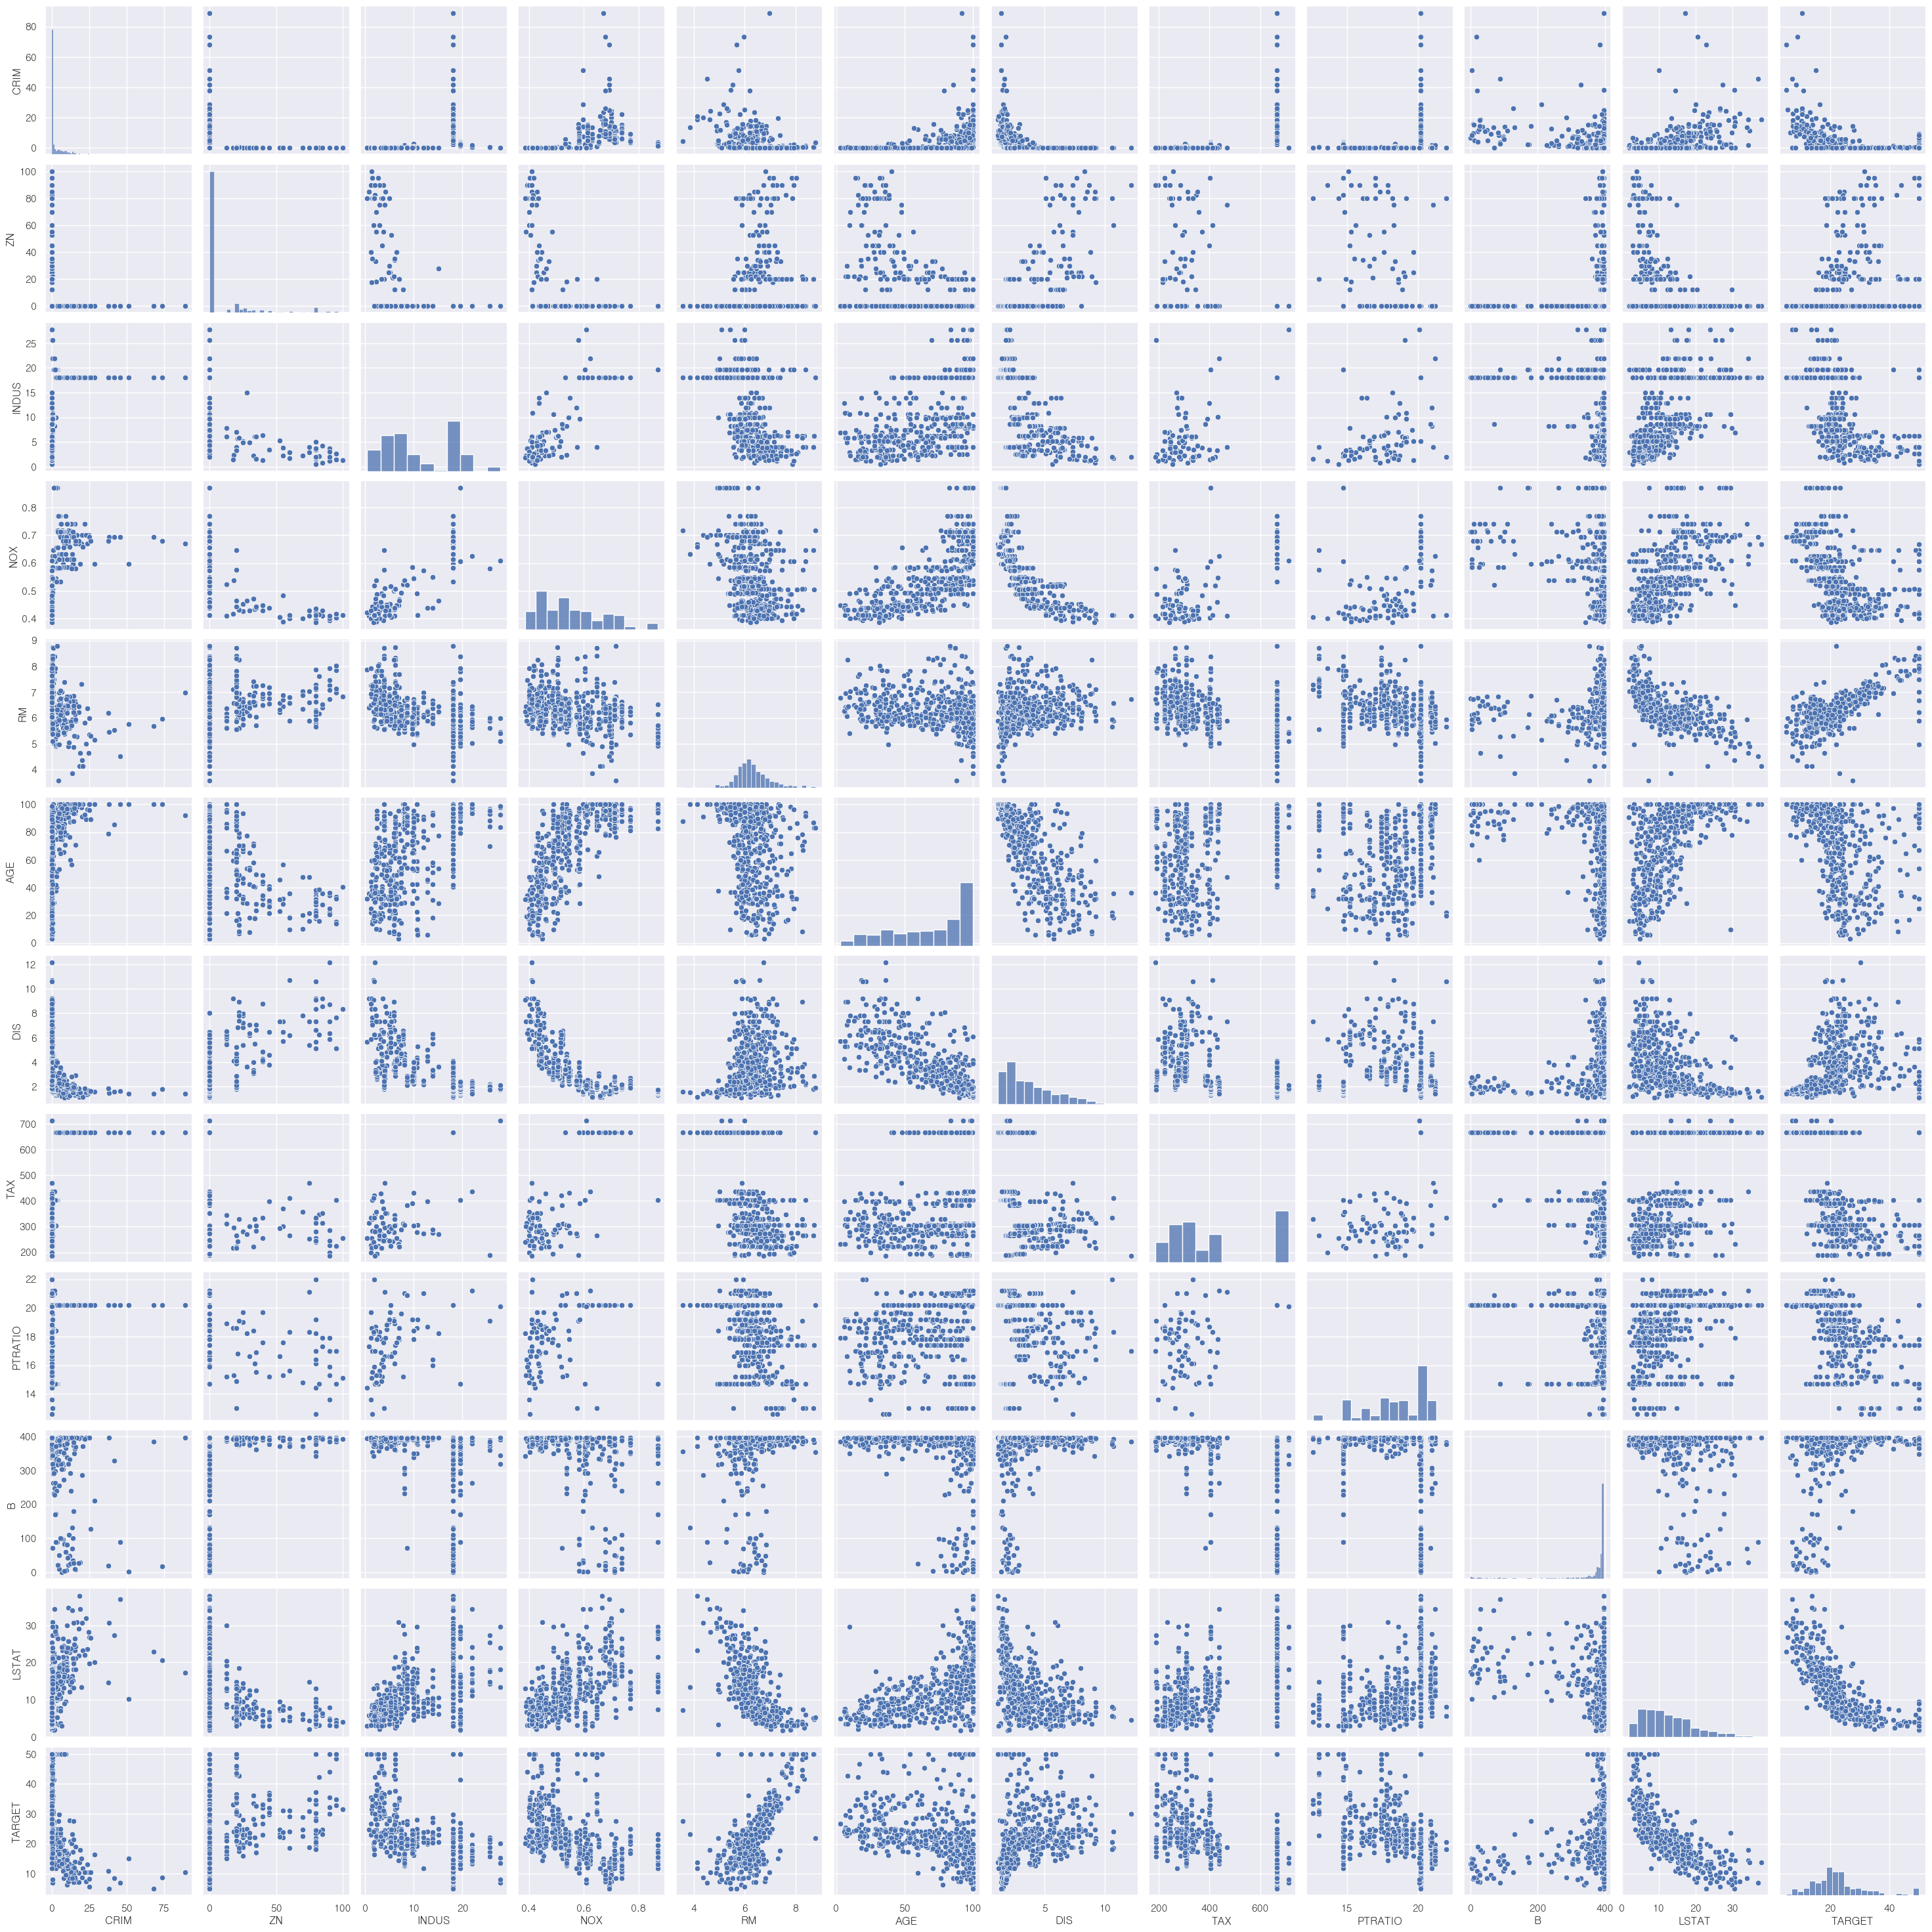

In [5]:
sns.pairplot(boston)
plt.show

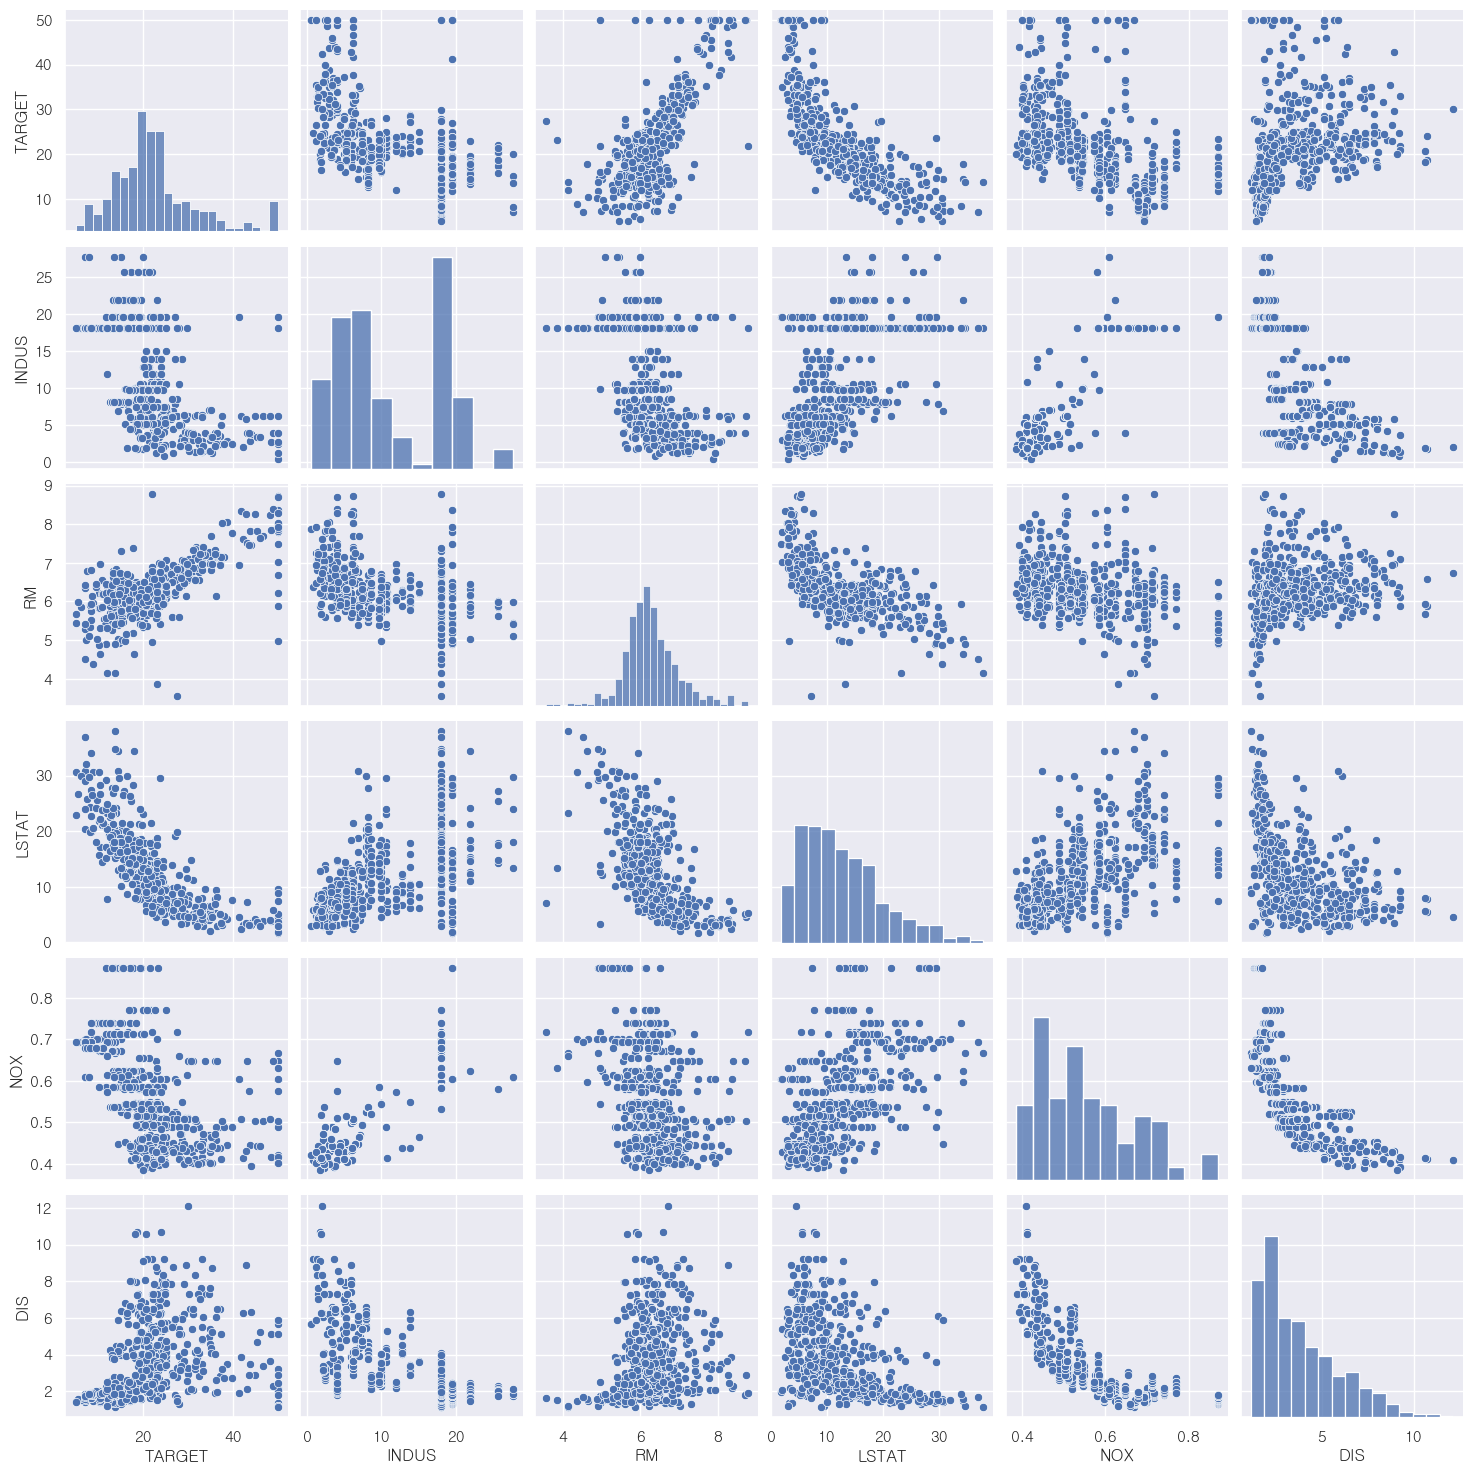

In [6]:
cols=["TARGET","INDUS","RM","LSTAT","NOX","DIS"]
sns.pairplot(boston[cols])
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
data= torch.from_numpy(boston[cols].values).float()
print(data)
print(data.shape)

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])
torch.Size([506, 6])


In [9]:
y = data[:, :1]
x = data[:, 1:]
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [10]:
n_epochs=2000
learning_rate = 1e-3
print_interval= 100

In [11]:
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [18]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward
    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss:%.4f' % (i + 1, loss))

Epoch 100: loss:28.9887
Epoch 200: loss:28.9887
Epoch 300: loss:28.9887
Epoch 400: loss:28.9887
Epoch 500: loss:28.9887
Epoch 600: loss:28.9887
Epoch 700: loss:28.9887
Epoch 800: loss:28.9887
Epoch 900: loss:28.9887
Epoch 1000: loss:28.9887
Epoch 1100: loss:28.9887
Epoch 1200: loss:28.9887
Epoch 1300: loss:28.9887
Epoch 1400: loss:28.9887
Epoch 1500: loss:28.9887
Epoch 1600: loss:28.9887
Epoch 1700: loss:28.9887
Epoch 1800: loss:28.9887
Epoch 1900: loss:28.9887
Epoch 2000: loss:28.9887


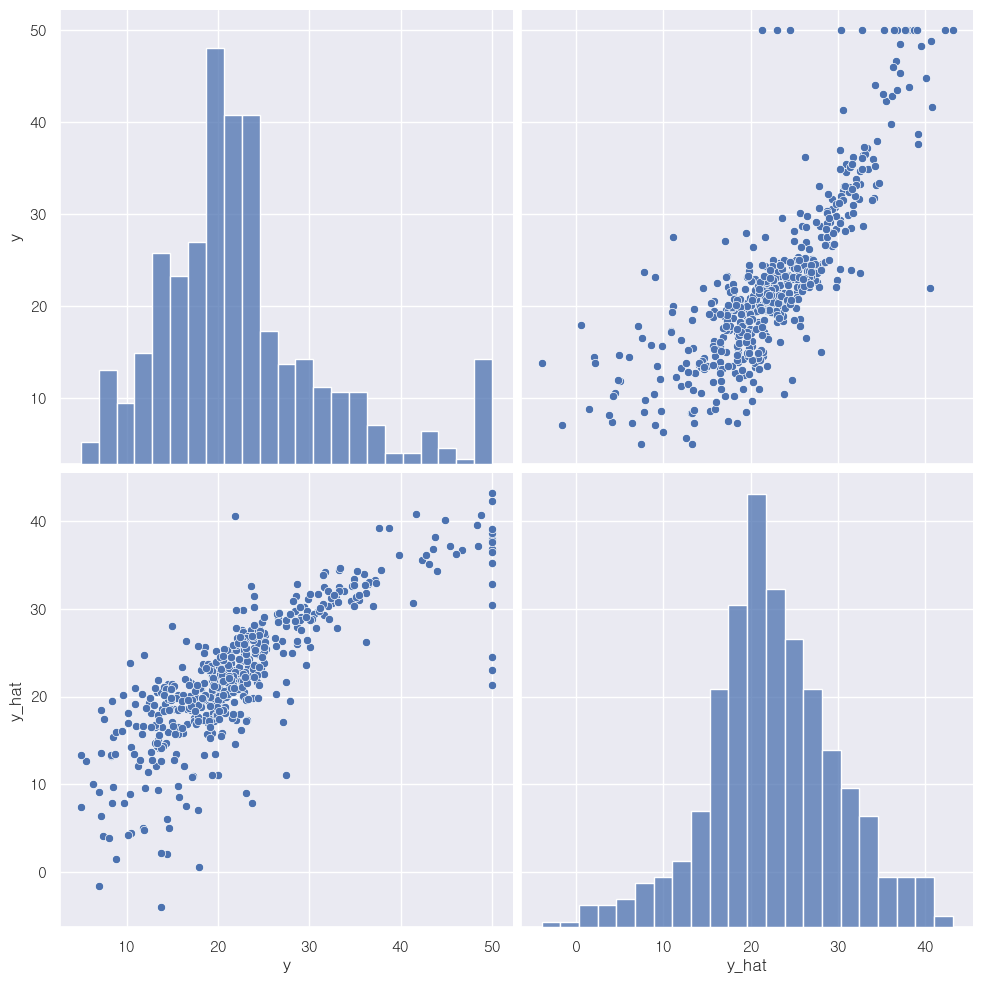

In [19]:
df= pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=["y", "y_hat"])
sns.pairplot(df, height=5)
plt.show()

In [16]:
class MulLinearRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(x.size(-1), y.size(-1))

    def forward(self, x):
        return self.linear(x)    

In [20]:
model=MulLinearRegModel()
optimizer=optim.SGD(model.parameters(), lr=learning_rate)

for i in range(n_epochs):
    y_hat=model(x)
    loss=F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss:%.4f' % (i + 1, loss))

Epoch 100: loss:43.1723
Epoch 200: loss:36.8913
Epoch 300: loss:33.4394
Epoch 400: loss:31.4938
Epoch 500: loss:30.3970
Epoch 600: loss:29.7786
Epoch 700: loss:29.4298
Epoch 800: loss:29.2329
Epoch 900: loss:29.1216
Epoch 1000: loss:29.0586
Epoch 1100: loss:29.0228
Epoch 1200: loss:29.0023
Epoch 1300: loss:28.9904
Epoch 1400: loss:28.9834
Epoch 1500: loss:28.9792
Epoch 1600: loss:28.9765
Epoch 1700: loss:28.9746
Epoch 1800: loss:28.9733
Epoch 1900: loss:28.9722
Epoch 2000: loss:28.9713
